In [364]:
# Import required libraries

import tensorflow as tf
import pandas as pd

In [366]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [367]:
insurance_one_hot = pd.get_dummies(insurance, dtype = "int")

insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [368]:
# Create X & y values (features and labels)

X = insurance_one_hot.drop("charges", axis = 1)

y = insurance_one_hot["charges"]

In [369]:
# View X

X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [370]:
# View y

y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [371]:
# Create training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 42)

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [372]:
# Build a neural network

tf.random.set_seed(42)

#               1. Creating a model

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = "relu", input_shape = [11]),
    tf.keras.layers.Dense(10, activation = "relu", input_shape = [11]),
    tf.keras.layers.Dense(1, activation = None, input_shape = [11])
])



#               2. Compile a model

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
                        metrics = ["mae"])



#               3. Fit the model

loss_history = insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100


c:\Users\Muhammad Abu Bakar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11250.6270 - mae: 11250.6270
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7417.0269 - mae: 7417.0269
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6961.3047 - mae: 6961.3047 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6380.0889 - mae: 6380.0889 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6061.5845 - mae: 6061.5845
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5713.3389 - mae: 5713.3389 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5110.3301 - mae: 5110.3301
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3980.8901 - mae: 3980.8901 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3584.5698 - mae: 3584.5698 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3558.9646 - mae: 3558.9646
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3417.0510 - mae: 3417.0510
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - los

In [373]:
# Evalute the insurance_model

insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1750.4297 - mae: 1750.4297  


[1778.052734375, 1778.052734375]

In [374]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

<Axes: >

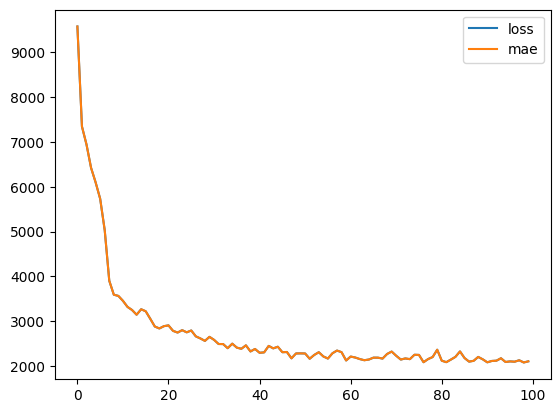

In [381]:
# Plot history (also known as a loss or a training curve)

import matplotlib.pyplot as plt

pd.DataFrame(loss_history.history).plot()

In [ ]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


> ### Visualizing Data

<Axes: ylabel='Frequency'>

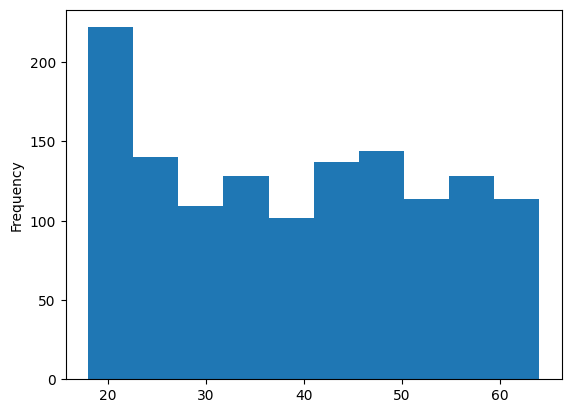

In [ ]:
insurance_one_hot["age"].plot(kind = "hist")

<Axes: ylabel='Frequency'>

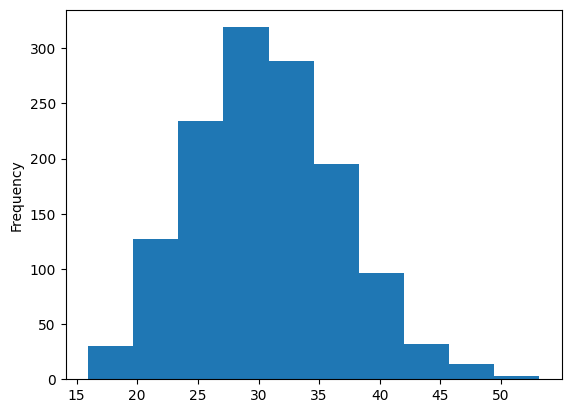

In [ ]:
insurance_one_hot["bmi"].plot(kind = "hist")

<Axes: ylabel='Frequency'>

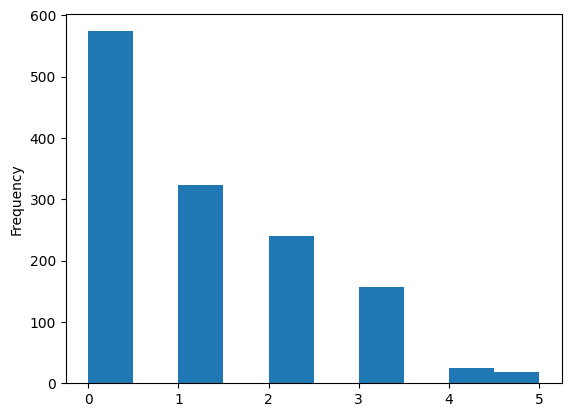

In [ ]:
insurance_one_hot["children"].plot(kind = "hist")

<Axes: ylabel='Frequency'>

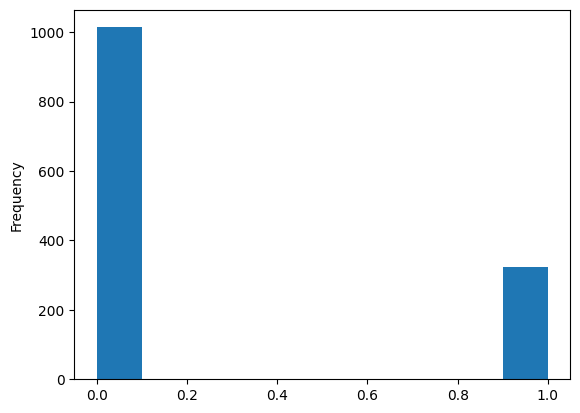

In [ ]:
insurance_one_hot["region_northeast"].plot(kind = "hist")

## Preprocessing data (normalization and standardization)

* In terms of scaling values, neural networks tend to prefer normalization.

* If you 're not sure on which to use, you could try both and see which performs better.

In [ ]:
# Starting from scrtach

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


> ### To prepare our data, we can borrow a few classes from scikit-learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values from these columns between 0 and 1
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
)

# Create X and y

X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

# Build your own train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Fit the column transfer to our training data

ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# how our data looks like after normalization

X_train_normal.shape

(1070, 11)

In [431]:
# Let's train a model on normalize data

tf.random.set_seed(42)

#               1. Creating a model

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])



#               2. Compile a model

insurance_model_3.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])



#               3. Fit the model

loss_history = insurance_model_3.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 13297.0527 - mae: 13297.0527
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13289.9873 - mae: 13289.9873
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13272.4785 - mae: 13272.4785
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13234.6035 - mae: 13234.6035 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13165.2822 - mae: 13165.2822
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13053.5654 - mae: 13053.5654
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12889.0449 - mae: 12889.0449
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12661.6025 - mae: 12661.6025 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12361.4883 - mae: 12361.4883 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11985.2451 - mae: 11985.2451 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11553.3262 - mae: 11553.3262
Epoch 12/100
34/34 ━━━━━━━

In [432]:
insurance_model_3.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8940.6309 - mae: 8940.6309  


[8772.9130859375, 8772.9130859375]

<Axes: >

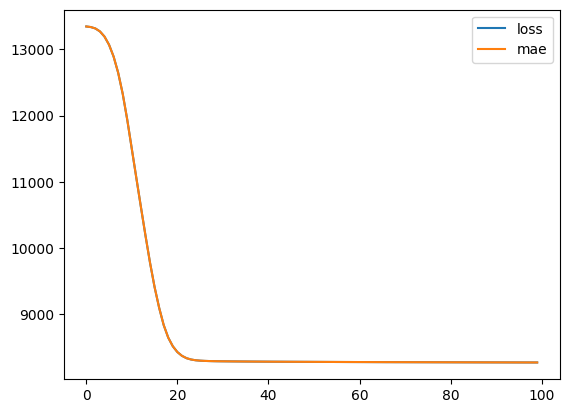

In [433]:
pd.DataFrame(loss_history.history).plot()